In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2025-03-02 17:57:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2025-03-02 17:57:31 (2.24 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df = df.drop(columns=['MODELYEAR', 'FUELCONSUMPTION_COMB_MPG'])

In [7]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

print(correlation_matrix)

                      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
ENGINESIZE              1.000000   0.934011              0.832225   
CYLINDERS               0.934011   1.000000              0.796473   
FUELCONSUMPTION_CITY    0.832225   0.796473              1.000000   
FUELCONSUMPTION_HWY     0.778746   0.724594              0.965718   
FUELCONSUMPTION_COMB    0.819482   0.776788              0.995542   
CO2EMISSIONS            0.874154   0.849685              0.898039   

                      FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  CO2EMISSIONS  
ENGINESIZE                       0.778746              0.819482      0.874154  
CYLINDERS                        0.724594              0.776788      0.849685  
FUELCONSUMPTION_CITY             0.965718              0.995542      0.898039  
FUELCONSUMPTION_HWY              1.000000              0.985804      0.861748  
FUELCONSUMPTION_COMB             0.985804              1.000000      0.892129  
CO2EMISSIONS                     0.8

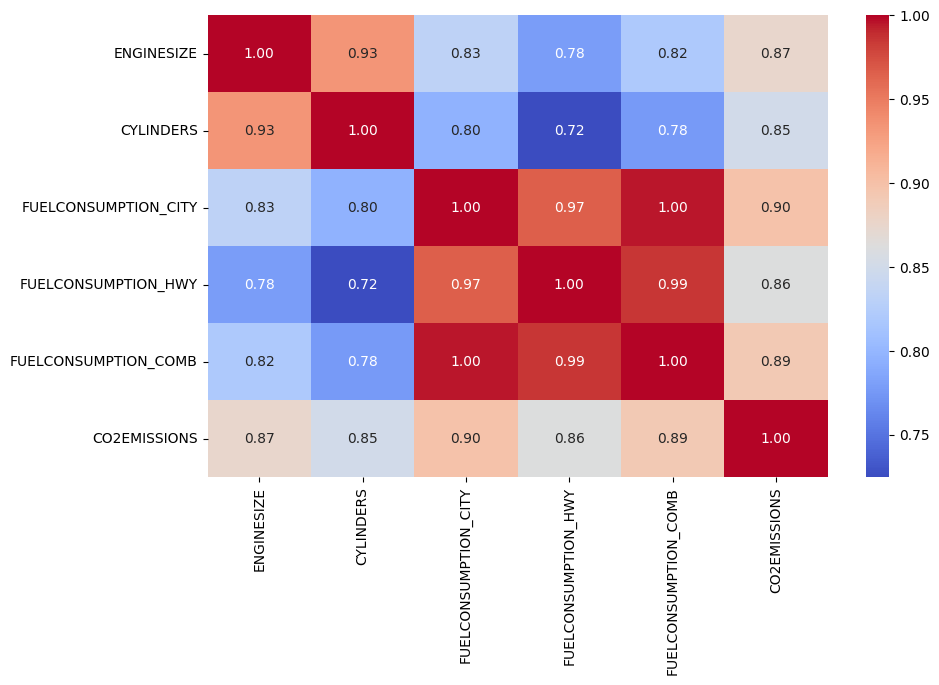

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [9]:
df1 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


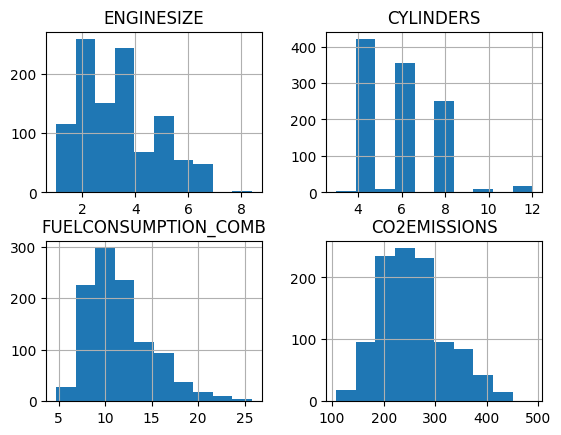

In [10]:
df1.hist()
plt.show()

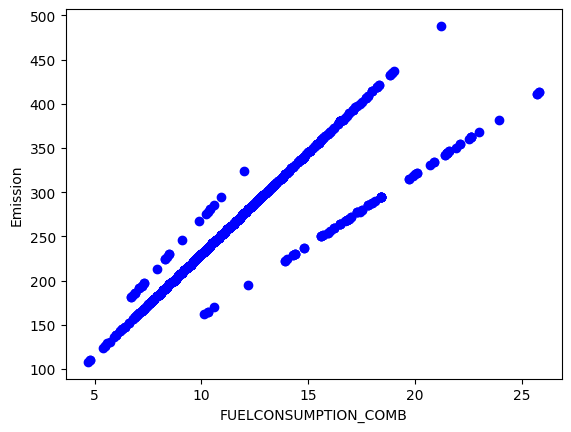

In [11]:
plt.scatter(df1.FUELCONSUMPTION_COMB, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

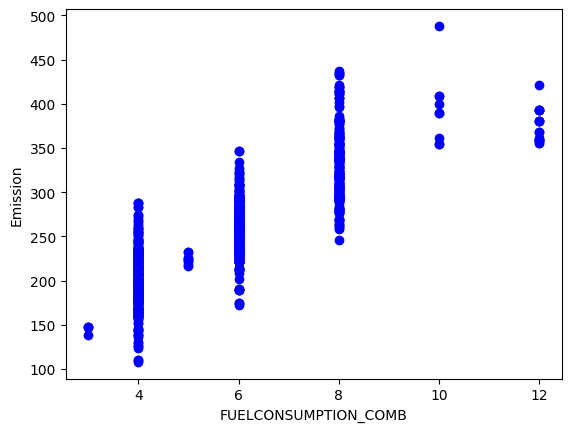

In [12]:
plt.scatter(df1.CYLINDERS, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

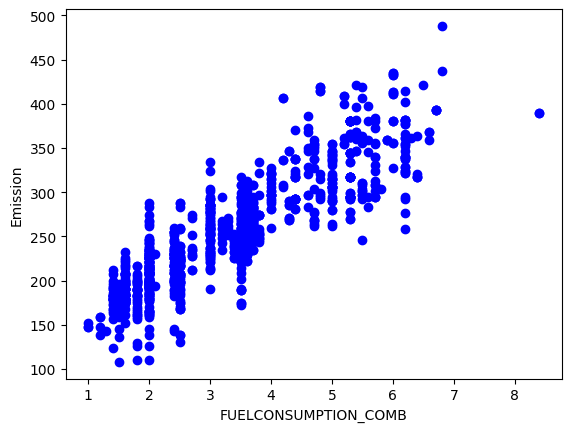

In [13]:
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [15]:
msk = np.random.rand(len(df1)) < 0.8
train = df1[msk]
test = df1[~msk]

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.67141858]]
Intercept:  [127.12638486]


Text(0, 0.5, 'Emission')

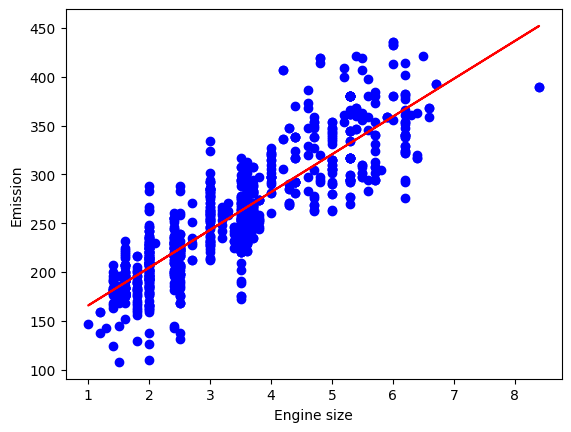

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


test_y_ - test_y will be the distance between the line and actual value . therefour the mean dist should be less for good machine

In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.01
Residual sum of squares (MSE): 1052.92
R2-score: 0.77


In [22]:
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
# print ('Coefficients: ', regr.coef_)
# print ('Intercept: ',regr.intercept_)
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 27.91
Residual sum of squares (MSE): 1343.96
R2-score: 0.71


In [23]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
# print ('Coefficients: ', regr.coef_)
# print ('Intercept: ',regr.intercept_)
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.39
Residual sum of squares (MSE): 865.29
R2-score: 0.81
